# Proyecto Final Portafolios de Inversión
> ### Aguilar Ceballos José Eddie y Lomelí Ureña Antonio

## 1. Elección de activos 

Uno de los puntos claves de la teoría moderna de portafolios es que al combinar activos, diversificar nuestras inversiones, conseguimos disminuir el riesgo al que nos vemos expuestos.

Estamos interesados en crear portafolios que combinen ETFs y acciones de empresas particulares porque pensamos que es una estrategia que nos puede servir como inversonistas. Los ETFs, al estar ya "diversificados" son buenos instrumentos de inversión pasiva, que capturan el comportamiento de los sectores en los que se especializan. Las acciones, por otro lado, dependen del desempeño de una empresa y del interés de los inversionistas en ella, se tiene la percepción de que ofrecen mayores rendimientos (con mayor riesgo).

Elegimos un ETF de los siguientes sectores:

- **Energético**: Vanguard Energy Index Fund (VDE). Es el sector que menor autocorrelación promedio tuvo con respecto a los demás sectores que componen al S&P 500, a pesar de tener rendimientos esperados más bajos en comparación con los otros, creemos que vale la pena.

- **Tecnologías de la Información**: SPDR S&P Semiconductor ETF (XSD). Replica el S&P Semiconductor Select Industry Index, elegimos este sector porque es el que tuvo mayor rendimiento entre 2012 y 2023. Creemos que vale la pena invertir en un ETF que se especialice en este sector en específico, a pesar de que compone la mayor parte del S&P 500, por su potencial de crecimiento.

- **Utilidades**: Utilities Select Sector SPDR Fund (XLU). Es un sector con poca autocorrelación promedio con los demás sectores. Sus operaciones tienen gran relación y correlación con los sectores industriales y de materiales, por eso incluiremos este y los demás no.

- **De la Salud**: Health Care Select Sector SPDR Fund (XLV). Es uno de los sectores que más rendimiento obtuvo en el periodo observado. A pesar de tener correlaciones mayores con otros sectores, en comparación de los bienes raíces o telecomunicaciones, cuenta con mayores rendimientos y, observando las gráficas, creemos que ha mostrado un crecimiento que ni los bienes raíces o comunicaciones tienen.

- **Consumo básico**: Vanguard Consumer Staples Fund (VDC). El consumo básico es algo necesario, tiene una correlación media menor a la de otros sectores. También observamos en las gráficas de precios de los ETFs que ha tenido crecimiento constante.

Pensamos en invertir estos sectores con el fin de diversificar a partir de los sectores que constituyen el mercado y el índice SP500. Consideramos las correlaciones individuales entre cada uno de ellos, las gráficas de precios de los ETFs, el rendimiento y volatilidad de los sectores que componen el SP500.

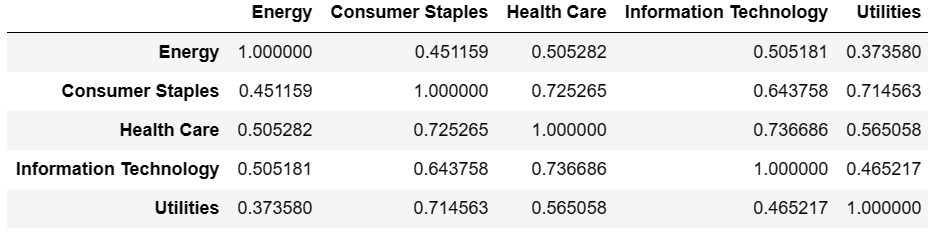
 
Los ETFs cumplen con; Tener activos netos por 1 billón de dólares o más, un volumen diario promedio mayor a 100,000 transacciones y existen desde antes del 2012 (nuestra fecha inicial para el proyecto).

Además de:

- **Invesco QQQ Trust (QQQ)**: Un ETF que sigue al S&P 500, Invesco es una empresa conocida por ofrecer ETFs con cuotas de mantenimiento baratas, además maneja activos por 172 billones de dólares y tiene un volumen promedio diario de 59 millones.
- **iShares MSCI Emerging Markets ETF (EEM)**: Este ETF sigue el índice MSCI de mercados emergentes. Cuenta con 24.7 billones de activos y un volumen medio diario de 32 millones de transacciones.

Las acciones que escogimos son:

- Microsoft Corp. (MSFT)
- Apple Inc (AAPL)
- Amazon.com, Inc. (AMZN)
- Walmart Inc. (WMT)
- Home Deopt, Inc. (HD)
- Costco Wholesale Corporation (COST)
- Pfizer, Inc. (PFE)


Como acciones de riesgo (aquí empresas pequeñas o así que empezaron a crecer recientemente).

- Baosheng Media Group (BAOS)
- Lexicon Pharmaceuticals, Inc (LXRX)
- Elevation Oncology, Inc (ELEV)

## 2. Selección de portafolios

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import yfinance
yfinance.pdr_override()

In [2]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

#### 2.1 Portafolio del 2016

Suponemos que en 2016 queremos invertir en el portafolio eficiente media varianza.

In [4]:
def get_closes(tickers, start = '2012-01-01', end = None):
    
    closes = web.get_data_yahoo(
        tickers=tickers,
        start=start,
        end=end)
    
    closes = closes['Adj Close']
    
    closes.sort_index(inplace=True)
    
    return closes

In [13]:
precios_activos_inicio = pd.DataFrame( {'VDE':[111.00,82.89,105.69,99.31,75.85,81.94],
                                        'XSD':[39.99,42.81,56.57,70.30,63.41,107.33],
                                        'XLU':[47.67,43.03,48.50,52.67,52.71,64.73],
                                        'XLV':[68.71,70.77,69.31,82.99,85.18,102.17],
                                        'VDC':[125.45,127.50,134.47,146.16,130.10,161.63],
                                        'QQQ':[103.76,109.43,119.31,156.50,150.99,214.40],
                                        'EEM':[39.19,31.35,35.39,47.78,38.59,45.36]      },
                                      
                                      index = ['2015','2016','2017','2018','2019','2020']
                                     )

precios_activos_inicio

,VDE,XSD,XLU,XLV,VDC,QQQ,EEM
2015,111.00,39.99,47.67,68.71,125.45,103.76,39.19
2016,82.89,42.81,43.03,70.77,127.50,109.43,31.35
2017,105.69,56.57,48.50,69.31,134.47,119.31,35.39
2018,99.31,70.30,52.67,82.99,146.16,156.50,47.78
2019,75.85,63.41,52.71,85.18,130.10,150.99,38.59
2020,81.94,107.33,64.73,102.17,161.63,214.40,45.36
